In [1]:
import pandas as pd
import spotipy
import numpy as np

In [2]:
charts = pd.read_csv('charts.csv/charts.csv')

In [5]:
charts.shape

(24501828, 9)

In [4]:
charts.head()

,title,rank,date,artist,url,region,chart,trend,streams
0,Despacito (Featuring Daddy Yankee),1,2017-04-01,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Argentina,top200,SAME_POSITION,306716.0
1,El Amante,2,2017-04-01,Nicky Jam,https://open.spotify.com/track/3umS4y3uQDkqekN...,Argentina,top200,MOVE_UP,189310.0
2,SUBEME LA RADIO (feat. Descemer Bueno & Zion &...,3,2017-04-01,Enrique Iglesias,https://open.spotify.com/track/7nKBxz47S9SD79N...,Argentina,top200,MOVE_UP,187749.0
3,Shape of You,4,2017-04-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Argentina,top200,MOVE_DOWN,185567.0
4,La Rompe Corazones,5,2017-04-01,"Daddy Yankee, Ozuna",https://open.spotify.com/track/4okba5wu9mMLXx7...,Argentina,top200,MOVE_UP,150052.0


In [6]:
charts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24501828 entries, 0 to 24501827
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   title    object 
 1   rank     int64  
 2   date     object 
 3   artist   object 
 4   url      object 
 5   region   object 
 6   chart    object 
 7   trend    object 
 8   streams  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.6+ GB


In [7]:
charts.isnull().sum(axis = 0)

title           11
rank             0
date             0
artist          18
url              0
region           0
chart            0
trend            0
streams    5431817
dtype: int64

In [8]:
genre = pd.read_csv('genre/data.csv', sep="#")

In [9]:
genre.shape

(321200, 6)

In [10]:
genre.nunique()

Position         200
Track Name      5496
Artist          1127
Streams       285248
Date            1606
Genre            969
dtype: int64

In [11]:
genre.head()

,Position,Track Name,Artist,Streams,Date,Genre
0,1,Starboy,The Weeknd,3135625,2017-01-01,"['canadian pop', 'canadian contemporary r&b', ..."
1,2,Closer,The Chainsmokers,3015525,2017-01-01,"['pop', 'pop dance', 'tropical house', 'edm', ..."
2,3,Let Me Love You,DJ Snake,2545384,2017-01-01,"['pop', 'electronic trap', 'dance pop', 'edm',..."
3,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604,2017-01-01,"['pop', 'uk dance', 'dance pop', 'uk funky', '..."
4,5,One Dance,Drake,2259887,2017-01-01,"['toronto rap', 'canadian pop', 'canadian hip ..."


In [12]:
genre = genre.groupby(by=["Track Name"]).max()

# groupby(by=["Track Name"]).max()genre[['Track Name','Genre']]

In [13]:
genre

,Position,Artist,Streams,Date,Genre
Track Name,,,,,
!,152,Trippie Redd,1266004,2019-08-10,"['melodic rap', 'rap', 'trap']"
#PROUDCATOWNERREMIX,189,XXXTENTACION,679370,2019-08-23,"['miami hip hop', 'emo rap']"
$$$ - with Matt Ox,197,XXXTENTACION,1199692,2018-06-21,"['miami hip hop', 'emo rap']"
$€ Freestyle,76,Sfera Ebbasta,1326336,2020-11-20,"['trap italiana', 'italian pop', 'italian hip ..."
'Till I Collapse,200,Eminem,733442,2018-09-08,"['detroit hip hop', 'rap', 'hip hop']"
...,...,...,...,...,...
Χ. ZWAAR,130,Damso,853905,2021-04-29,"['rap conscient', 'rap belge', 'belgian hip ho..."
Ψ. PASSION,116,Damso,906293,2021-04-29,"['rap conscient', 'rap belge', 'belgian hip ho..."
Ω. VIVRE UN PEU,166,Damso,783257,2021-04-29,"['rap conscient', 'rap belge', 'belgian hip ho..."


In [14]:
# Include genre for tracks

charts_with_genre = pd.merge(left = charts,
                                 right = genre,
                                 how = 'left', 
                                 left_on = "title", 
                                 right_on= "Track Name")
display(charts_with_genre.shape)
charts_with_genre.head()

(24501828, 14)

,title,rank,date,artist,url,region,chart,trend,streams,Position,Artist,Streams,Date,Genre
0,Despacito (Featuring Daddy Yankee),1,2017-04-01,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Argentina,top200,SAME_POSITION,306716.0,200.0,Luis Fonsi,11381520.0,2018-07-22,"['puerto rican pop', 'latin', 'latin pop']"
1,El Amante,2,2017-04-01,Nicky Jam,https://open.spotify.com/track/3umS4y3uQDkqekN...,Argentina,top200,MOVE_UP,189310.0,200.0,Nicky Jam,1662381.0,2017-10-28,"['latin', 'reggaeton', 'latin hip hop', 'trap ..."
2,SUBEME LA RADIO (feat. Descemer Bueno & Zion &...,3,2017-04-01,Enrique Iglesias,https://open.spotify.com/track/7nKBxz47S9SD79N...,Argentina,top200,MOVE_UP,187749.0,198.0,Enrique Iglesias,2169462.0,2017-10-14,"['mexican pop', 'latin pop', 'dance pop', 'lat..."
3,Shape of You,4,2017-04-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Argentina,top200,MOVE_DOWN,185567.0,198.0,Ed Sheeran,9891056.0,2021-07-17,"['uk pop', 'pop']"
4,La Rompe Corazones,5,2017-04-01,"Daddy Yankee, Ozuna",https://open.spotify.com/track/4okba5wu9mMLXx7...,Argentina,top200,MOVE_UP,150052.0,192.0,Daddy Yankee,949036.0,2017-10-29,"['reggaeton', 'latin', 'latin hip hop', 'trap ..."


In [15]:
charts_with_genre['Genre'].value_counts()

['pop', 'post-teen pop', 'dance pop']                                  681458
['uk pop', 'pop']                                                      496692
['trap latino', 'reggaeton', 'latin']                                  406342
['dfw rap', 'melodic rap', 'rap']                                      255694
['pop', 'electropop']                                                  238745
                                                                        ...  
['permanent wave', 'pop punk', 'punk']                                     10
['miami hip hop', 'underground hip hop', 'dark trap', 'vapor trap']         8
['modern blues', 'soul']                                                    6
['socal pop punk', 'pop punk', 'punk']                                      6
['russelater']                                                              2
Name: Genre, Length: 951, dtype: int64

In [16]:
# Extract track id from url

charts_with_genre['track id'] = charts_with_genre['url'].str.replace('https://open.spotify.com/track/',"")

<ipython-input-16-a60c09366a13>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  charts_with_genre['track id'] = charts_with_genre['url'].str.replace('https://open.spotify.com/track/',"")


In [17]:
charts_with_genre.head()

,title,rank,date,artist,url,region,chart,trend,streams,Position,Artist,Streams,Date,Genre,track id
0,Despacito (Featuring Daddy Yankee),1,2017-04-01,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Argentina,top200,SAME_POSITION,306716.0,200.0,Luis Fonsi,11381520.0,2018-07-22,"['puerto rican pop', 'latin', 'latin pop']",4aWmUDTfIPGksMNLV2rQP2
1,El Amante,2,2017-04-01,Nicky Jam,https://open.spotify.com/track/3umS4y3uQDkqekN...,Argentina,top200,MOVE_UP,189310.0,200.0,Nicky Jam,1662381.0,2017-10-28,"['latin', 'reggaeton', 'latin hip hop', 'trap ...",3umS4y3uQDkqekNjVpiRUs
2,SUBEME LA RADIO (feat. Descemer Bueno & Zion &...,3,2017-04-01,Enrique Iglesias,https://open.spotify.com/track/7nKBxz47S9SD79N...,Argentina,top200,MOVE_UP,187749.0,198.0,Enrique Iglesias,2169462.0,2017-10-14,"['mexican pop', 'latin pop', 'dance pop', 'lat...",7nKBxz47S9SD79N086fuhn
3,Shape of You,4,2017-04-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Argentina,top200,MOVE_DOWN,185567.0,198.0,Ed Sheeran,9891056.0,2021-07-17,"['uk pop', 'pop']",7qiZfU4dY1lWllzX7mPBI3
4,La Rompe Corazones,5,2017-04-01,"Daddy Yankee, Ozuna",https://open.spotify.com/track/4okba5wu9mMLXx7...,Argentina,top200,MOVE_UP,150052.0,192.0,Daddy Yankee,949036.0,2017-10-29,"['reggaeton', 'latin', 'latin hip hop', 'trap ...",4okba5wu9mMLXx79DXLKi3


In [39]:
# Import features

features = pd.read_csv('Features/combined-csv-files.csv')


C:\Users\renev\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [40]:
features


,Unnamed: 0,id,name,album,artist,duration_ms,release_date,length,popularity,acousticness,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.0,1Pir8D7cNrusAlODsBuhih,Твой бред,Твой бред,FOILAR,130986,2021-06-25,130985,33,0.0201,...,0.936,0.0,0,0.0885,-2.336,1,0.104,142.01,4,0.809
1,1.0,1rHcgLKBdI6iTmAiISOzU7,A 100,A 100,Lenny Tavárez,218913,2021-02-25,218912,55,0.53,...,0.556,2.21e-05,6,0.147,-4.89,1,0.41,92.008,4,0.47
2,2.0,70IVQO4Pfr0oMszh7KLfjK,すきっ!,ときおとめ,Tokimeki Sendenbu,316333,2018-03-28,316333,41,0.0188,...,0.952,5.09e-06,10,0.387,-2.318,1,0.0646,163.008,4,0.445
3,3.0,45nCkTGBWQ3kjt9uxZybUP,Keď som išiel...,Bolo nás jedenást,Milan Lasica,153467,1981-01-01,153466,21,0.31,...,0.959,0.0,4,0.351,-2.663,1,0.137,136.822,4,0.69
4,4.0,15mFoRfeFEHFksh7UGjrvT,分你一半,分你一半,不是花火呀,195200,2021-04-14,195200,46,0.869,...,0.307,0.0,3,0.371,-10.9,1,0.0714,75.067,4,0.473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207390,20,33CdK2WiQfodCIHiXfgoLJ,Changes,Greatest Hits,2Pac,268773,1998-01-01,268773,41,0.0454,...,0.675,0.0,0,0.244,-5.998,1,0.0727,111.101,4,0.321
207391,21,6b2oQwSGFkzsMtQruIWm2p,Creep,Pablo Honey,Radiohead,238640,1993-02-22,238640,12,0.0102,...,0.43,0.000141,7,0.129,-9.935,1,0.0369,91.841,4,0.104
207392,22,42et6fnHCw1HIPSrdPprMl,Semi-Charmed Life,Third Eye Blind,Third Eye Blind,268360,1997-04-08,268360,74,0.00832,...,0.864,0.0,7,0.123,-6.576,1,0.0314,102.026,4,0.701
207393,23,5UWwZ5lm5PKu6eKsHAGxOk,Everlong,The Colour And The Shape,Foo Fighters,250547,1997-05-20,250546,77,5.99e-05,...,0.881,0.000308,11,0.0805,-5.541,0,0.0367,158.066,4,0.364


In [41]:
# Drop duplicate track id's

features.sort_values("id", inplace = True)
features.drop_duplicates(subset ="id",
                     keep = 'first', inplace = True)

# Syntax: DataFrame.drop_duplicates(subset=None, keep=’first’, inplace=False)
# Parameters: 
# subset: Subset takes a column or list of column label. It’s default value is none. After passing columns, it will consider them only for duplicates. 
# keep: keep is to control how to consider duplicate value. It has only three distinct value and default is ‘first’. 
 

# If ‘first’, it considers first value as unique and rest of the same values as duplicate.
# If ‘last’, it considers last value as unique and rest of the same values as duplicate.
# If False, it consider all of the same values as duplicates
# inplace: Boolean values, removes rows with duplicates if True.
# # Return type: DataFrame with removed duplicate rows depending on Arguments passed. 

In [42]:
features

,Unnamed: 0,id,name,album,artist,duration_ms,release_date,length,popularity,acousticness,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
189953,324.0,000RW47rhEkSqjgTrZx7YX,Lance Individual,Tudo Em Paz,Jorge & Mateus,164459,2021-04-22,164458,62,0.309,...,0.62,0.0,5,0.075,-5.536,1,0.0509,117.399,4,0.962
117564,207.0,000xQL6tZNLJzIrtIgxqSl,Still Got Time (feat. PARTYNEXTDOOR),Still Got Time (feat. PARTYNEXTDOOR),ZAYN,188491,2017-03-23,188490,59,0.131,...,0.627,0.0,7,0.0852,-6.029,1,0.0639,120.963,4,0.524
117915,558.0,000xYdQfIZ4pDmBGzQalKU,"Eu, Você, O Mar e Ela",1977,Luan Santana,187119,2016-11-04,187118,55,0.684,...,0.803,0.000539,0,0.463,-6.743,1,0.04,166.018,4,0.651
51187,1398.0,0010ypQ2nPZdksx1kEjt66,As Nieko Nezinau,As Nieko Nezinau,Kamaniu Silelis,226387,2018-04-23,226386,20,0.889,...,0.226,0.0284,7,0.0652,-13.457,1,0.0403,118.945,4,0.117
106906,55.0,00115zIia5fhpbtl4c58RZ,Pokoj,Pokoj,Lenka Piešová,187000,2020-12-04,187000,24,0.143,...,0.349,6.32e-05,1,0.093,-7.34,1,0.0346,121.054,4,0.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107310,55.0,7zzbnhCpuuHOCrhBGvgwpp,Wouldn’t Change A Thing,Need Of You,Lawrence Hancock,184950,2021-05-07,184949,14,0.00189,...,0.518,2.48e-05,1,0.117,-7.274,1,0.056,78.022,4,0.0389
174232,1787.0,7zzhRAobAnNjarw2FAWt65,ארבעה אחים - פסח,שירי החגים הגדולים בכל הזמנים,Various Artists,116867,2011-09-01,116866,0,0.856,...,0.344,0.0,7,0.103,-10.621,0,0.037,125.529,3,0.872
160594,149.0,7zzhknA0A39TH81meuX7WA,C'est pas des LOL,Rien 100 Rien (Réédition),Jul,279467,2019-10-04,279466,51,0.187,...,0.7,0.0,9,0.094,-6.526,0,0.0519,132.004,4,0.886
19340,NaN,id,name,album,artist,duration_ms,release_date,length,popularity,acousticness,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence


In [43]:
# Combine features

charts_with_features = pd.merge(left = charts_with_genre,
                                 right = features,
                                 how = 'left', 
                                 left_on = "track id", 
                                 right_on= "id")
display(charts_with_features.shape)
charts_with_features.head()

(24501828, 36)

,title,rank,date,artist_x,url,region,chart,trend,streams,Position,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Despacito (Featuring Daddy Yankee),1,2017-04-01,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Argentina,top200,SAME_POSITION,306716.0,200.0,...,0.786,0.0,2,0.112,-4.757,1,0.17,177.833,4,0.846
1,El Amante,2,2017-04-01,Nicky Jam,https://open.spotify.com/track/3umS4y3uQDkqekN...,Argentina,top200,MOVE_UP,189310.0,200.0,...,0.691,0.0,8,0.14,-5.535,1,0.0432,179.91,4,0.732
2,SUBEME LA RADIO (feat. Descemer Bueno & Zion &...,3,2017-04-01,Enrique Iglesias,https://open.spotify.com/track/7nKBxz47S9SD79N...,Argentina,top200,MOVE_UP,187749.0,198.0,...,0.823,0.0,9,0.111,-3.297,0,0.0773,91.048,4,0.647
3,Shape of You,4,2017-04-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Argentina,top200,MOVE_DOWN,185567.0,198.0,...,0.652,0.0,1,0.0931,-3.183,0,0.0802,95.977,4,0.931
4,La Rompe Corazones,5,2017-04-01,"Daddy Yankee, Ozuna",https://open.spotify.com/track/4okba5wu9mMLXx7...,Argentina,top200,MOVE_UP,150052.0,192.0,...,0.859,0.0,5,0.317,-2.595,0,0.0553,176.018,4,0.891


In [44]:
charts_with_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24501828 entries, 0 to 24501827
Data columns (total 36 columns):
 #   Column            Dtype  
---  ------            -----  
 0   title             object 
 1   rank              int64  
 2   date              object 
 3   artist_x          object 
 4   url               object 
 5   region            object 
 6   chart             object 
 7   trend             object 
 8   streams           float64
 9   Position          float64
 10  Artist            object 
 11  Streams           float64
 12  Date              object 
 13  Genre             object 
 14  track id          object 
 15  Unnamed: 0        object 
 16  id                object 
 17  name              object 
 18  album             object 
 19  artist_y          object 
 20  duration_ms       object 
 21  release_date      object 
 22  length            object 
 23  popularity        object 
 24  acousticness      object 
 25  danceability      object 
 26  energy      

In [45]:
charts_with_features.isnull().sum(axis = 0)

# Rows where streams are null are due to viral50 chart 
# Null values in audio features are due to tracks that returned null from Spotify API → see null_audio_features.csv
# No need to drop any rows

title                     11
rank                       0
date                       0
artist_x                  18
url                        0
region                     0
chart                      0
trend                      0
streams              5431817
Position            10092818
Artist              10092818
Streams             10092818
Date                10092818
Genre               10092818
track id                   0
Unnamed: 0               496
id                       496
name                     757
album                    757
artist_y                 811
duration_ms              496
release_date             496
length                   496
popularity               496
acousticness             496
danceability             496
energy                   496
instrumentalness         496
key                      496
liveness                 496
loudness                 496
mode                     496
speechiness              496
tempo                    496
time_signature

In [51]:
# Drop unnecessary or duplicate columns

charts_clean = charts_with_features.drop([
'Position',         
'Artist',          
'Streams',          
'Date',              
'Unnamed: 0',       
'name',              
'artist_y',
'trend'    
 ],axis=1)  


In [53]:
charts_clean.head()

,title,rank,date,artist_x,url,region,chart,streams,Genre,track id,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Despacito (Featuring Daddy Yankee),1,2017-04-01,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Argentina,top200,306716.0,"['puerto rican pop', 'latin', 'latin pop']",4aWmUDTfIPGksMNLV2rQP2,...,0.786,0.0,2,0.112,-4.757,1,0.17,177.833,4,0.846
1,El Amante,2,2017-04-01,Nicky Jam,https://open.spotify.com/track/3umS4y3uQDkqekN...,Argentina,top200,189310.0,"['latin', 'reggaeton', 'latin hip hop', 'trap ...",3umS4y3uQDkqekNjVpiRUs,...,0.691,0.0,8,0.14,-5.535,1,0.0432,179.91,4,0.732
2,SUBEME LA RADIO (feat. Descemer Bueno & Zion &...,3,2017-04-01,Enrique Iglesias,https://open.spotify.com/track/7nKBxz47S9SD79N...,Argentina,top200,187749.0,"['mexican pop', 'latin pop', 'dance pop', 'lat...",7nKBxz47S9SD79N086fuhn,...,0.823,0.0,9,0.111,-3.297,0,0.0773,91.048,4,0.647
3,Shape of You,4,2017-04-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Argentina,top200,185567.0,"['uk pop', 'pop']",7qiZfU4dY1lWllzX7mPBI3,...,0.652,0.0,1,0.0931,-3.183,0,0.0802,95.977,4,0.931
4,La Rompe Corazones,5,2017-04-01,"Daddy Yankee, Ozuna",https://open.spotify.com/track/4okba5wu9mMLXx7...,Argentina,top200,150052.0,"['reggaeton', 'latin', 'latin hip hop', 'trap ...",4okba5wu9mMLXx79DXLKi3,...,0.859,0.0,5,0.317,-2.595,0,0.0553,176.018,4,0.891


In [54]:
# Changing column names

charts_clean.columns= charts_clean.columns.str.lower()
charts_clean.columns = charts_clean.columns.str.replace(' ','_')
charts_clean

,title,rank,date,artist_x,url,region,chart,streams,genre,track_id,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Despacito (Featuring Daddy Yankee),1,2017-04-01,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Argentina,top200,306716.0,"['puerto rican pop', 'latin', 'latin pop']",4aWmUDTfIPGksMNLV2rQP2,...,0.786,0.0,2,0.112,-4.757,1,0.17,177.833,4,0.846
1,El Amante,2,2017-04-01,Nicky Jam,https://open.spotify.com/track/3umS4y3uQDkqekN...,Argentina,top200,189310.0,"['latin', 'reggaeton', 'latin hip hop', 'trap ...",3umS4y3uQDkqekNjVpiRUs,...,0.691,0.0,8,0.14,-5.535,1,0.0432,179.91,4,0.732
2,SUBEME LA RADIO (feat. Descemer Bueno & Zion &...,3,2017-04-01,Enrique Iglesias,https://open.spotify.com/track/7nKBxz47S9SD79N...,Argentina,top200,187749.0,"['mexican pop', 'latin pop', 'dance pop', 'lat...",7nKBxz47S9SD79N086fuhn,...,0.823,0.0,9,0.111,-3.297,0,0.0773,91.048,4,0.647
3,Shape of You,4,2017-04-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Argentina,top200,185567.0,"['uk pop', 'pop']",7qiZfU4dY1lWllzX7mPBI3,...,0.652,0.0,1,0.0931,-3.183,0,0.0802,95.977,4,0.931
4,La Rompe Corazones,5,2017-04-01,"Daddy Yankee, Ozuna",https://open.spotify.com/track/4okba5wu9mMLXx7...,Argentina,top200,150052.0,"['reggaeton', 'latin', 'latin hip hop', 'trap ...",4okba5wu9mMLXx79DXLKi3,...,0.859,0.0,5,0.317,-2.595,0,0.0553,176.018,4,0.891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24501823,BYE,46,2021-07-31,Jaden,https://open.spotify.com/track/3OUyyDN7EZrL7i0...,Vietnam,viral50,NaN,NaN,3OUyyDN7EZrL7i0Sbi5SVd,...,0.51,0.0127,0,0.162,-6.348,1,0.0344,119.986,4,0.334
24501824,Pillars,47,2021-07-31,My Anh,https://open.spotify.com/track/6eky30oFiQbHUAT...,Vietnam,viral50,NaN,NaN,6eky30oFiQbHUATDlOCGys,...,0.716,6.4e-05,11,0.353,-7.672,0,0.0977,155.958,4,0.656
24501825,Gái Độc Thân,48,2021-07-31,Tlinh,https://open.spotify.com/track/2klsSb2iTfgDh95...,Vietnam,viral50,NaN,NaN,2klsSb2iTfgDh95Ak9uWY2,...,0.665,0.0036,0,0.154,-8.625,0,0.0432,99.977,4,0.544
24501826,Renegade (feat. Taylor Swift),49,2021-07-31,Big Red Machine,https://open.spotify.com/track/1aU1wpYBSpP0M6I...,Vietnam,viral50,NaN,"['eau claire indie', 'folktronica']",1aU1wpYBSpP0M6IiihY5Ue,...,0.708,0.0236,0,0.107,-8.121,1,0.0505,167.977,4,0.586


In [56]:
charts_clean['genre'] = charts_clean['genre'].fillna('Unknown')

In [57]:
charts_clean

,title,rank,date,artist_x,url,region,chart,streams,genre,track_id,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Despacito (Featuring Daddy Yankee),1,2017-04-01,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Argentina,top200,306716.0,"['puerto rican pop', 'latin', 'latin pop']",4aWmUDTfIPGksMNLV2rQP2,...,0.786,0.0,2,0.112,-4.757,1,0.17,177.833,4,0.846
1,El Amante,2,2017-04-01,Nicky Jam,https://open.spotify.com/track/3umS4y3uQDkqekN...,Argentina,top200,189310.0,"['latin', 'reggaeton', 'latin hip hop', 'trap ...",3umS4y3uQDkqekNjVpiRUs,...,0.691,0.0,8,0.14,-5.535,1,0.0432,179.91,4,0.732
2,SUBEME LA RADIO (feat. Descemer Bueno & Zion &...,3,2017-04-01,Enrique Iglesias,https://open.spotify.com/track/7nKBxz47S9SD79N...,Argentina,top200,187749.0,"['mexican pop', 'latin pop', 'dance pop', 'lat...",7nKBxz47S9SD79N086fuhn,...,0.823,0.0,9,0.111,-3.297,0,0.0773,91.048,4,0.647
3,Shape of You,4,2017-04-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Argentina,top200,185567.0,"['uk pop', 'pop']",7qiZfU4dY1lWllzX7mPBI3,...,0.652,0.0,1,0.0931,-3.183,0,0.0802,95.977,4,0.931
4,La Rompe Corazones,5,2017-04-01,"Daddy Yankee, Ozuna",https://open.spotify.com/track/4okba5wu9mMLXx7...,Argentina,top200,150052.0,"['reggaeton', 'latin', 'latin hip hop', 'trap ...",4okba5wu9mMLXx79DXLKi3,...,0.859,0.0,5,0.317,-2.595,0,0.0553,176.018,4,0.891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24501823,BYE,46,2021-07-31,Jaden,https://open.spotify.com/track/3OUyyDN7EZrL7i0...,Vietnam,viral50,NaN,Unknown,3OUyyDN7EZrL7i0Sbi5SVd,...,0.51,0.0127,0,0.162,-6.348,1,0.0344,119.986,4,0.334
24501824,Pillars,47,2021-07-31,My Anh,https://open.spotify.com/track/6eky30oFiQbHUAT...,Vietnam,viral50,NaN,Unknown,6eky30oFiQbHUATDlOCGys,...,0.716,6.4e-05,11,0.353,-7.672,0,0.0977,155.958,4,0.656
24501825,Gái Độc Thân,48,2021-07-31,Tlinh,https://open.spotify.com/track/2klsSb2iTfgDh95...,Vietnam,viral50,NaN,Unknown,2klsSb2iTfgDh95Ak9uWY2,...,0.665,0.0036,0,0.154,-8.625,0,0.0432,99.977,4,0.544
24501826,Renegade (feat. Taylor Swift),49,2021-07-31,Big Red Machine,https://open.spotify.com/track/1aU1wpYBSpP0M6I...,Vietnam,viral50,NaN,"['eau claire indie', 'folktronica']",1aU1wpYBSpP0M6IiihY5Ue,...,0.708,0.0236,0,0.107,-8.121,1,0.0505,167.977,4,0.586


In [58]:
charts_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24501828 entries, 0 to 24501827
Data columns (total 28 columns):
 #   Column            Dtype  
---  ------            -----  
 0   title             object 
 1   rank              int64  
 2   date              object 
 3   artist_x          object 
 4   url               object 
 5   region            object 
 6   chart             object 
 7   streams           float64
 8   genre             object 
 9   track_id          object 
 10  id                object 
 11  album             object 
 12  duration_ms       object 
 13  release_date      object 
 14  length            object 
 15  popularity        object 
 16  acousticness      object 
 17  danceability      object 
 18  energy            object 
 19  instrumentalness  object 
 20  key               object 
 21  liveness          object 
 22  loudness          object 
 23  mode              object 
 24  speechiness       object 
 25  tempo             object 
 26  time_signatu

In [59]:
# Change object to float

# df['column'] = pd.to_numeric(df['column'],errors = 'coerce')

charts_clean['length'] = pd.to_numeric(charts_clean['length'])
charts_clean['popularity'] = pd.to_numeric(charts_clean['popularity'])
charts_clean['acousticness'] = pd.to_numeric(charts_clean['acousticness'])
charts_clean['danceability'] = pd.to_numeric(charts_clean['danceability'])
charts_clean['energy'] = pd.to_numeric(charts_clean['energy'])
charts_clean['instrumentalness'] = pd.to_numeric(charts_clean['instrumentalness'])
charts_clean['key'] = pd.to_numeric(charts_clean['key'])
charts_clean['liveness'] = pd.to_numeric(charts_clean['liveness'])
charts_clean['loudness'] = pd.to_numeric(charts_clean['loudness'])
charts_clean['mode'] = pd.to_numeric(charts_clean['mode'])
charts_clean['speechiness'] = pd.to_numeric(charts_clean['speechiness'])
charts_clean['tempo'] = pd.to_numeric(charts_clean['tempo'])
charts_clean['time_signature'] = pd.to_numeric(charts_clean['time_signature'])
charts_clean['valence'] = pd.to_numeric(charts_clean['valence'])
charts_clean['duration_ms'] = pd.to_numeric(charts_clean['duration_ms'])

In [60]:
charts_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24501828 entries, 0 to 24501827
Data columns (total 28 columns):
 #   Column            Dtype  
---  ------            -----  
 0   title             object 
 1   rank              int64  
 2   date              object 
 3   artist_x          object 
 4   url               object 
 5   region            object 
 6   chart             object 
 7   streams           float64
 8   genre             object 
 9   track_id          object 
 10  id                object 
 11  album             object 
 12  duration_ms       float64
 13  release_date      object 
 14  length            float64
 15  popularity        float64
 16  acousticness      float64
 17  danceability      float64
 18  energy            float64
 19  instrumentalness  float64
 20  key               float64
 21  liveness          float64
 22  loudness          float64
 23  mode              float64
 24  speechiness       float64
 25  tempo             float64
 26  time_signatu

In [61]:
# Exporting clean file to csv

charts_clean.to_csv('charts_clean.csv')

# Dataframe exploring 

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

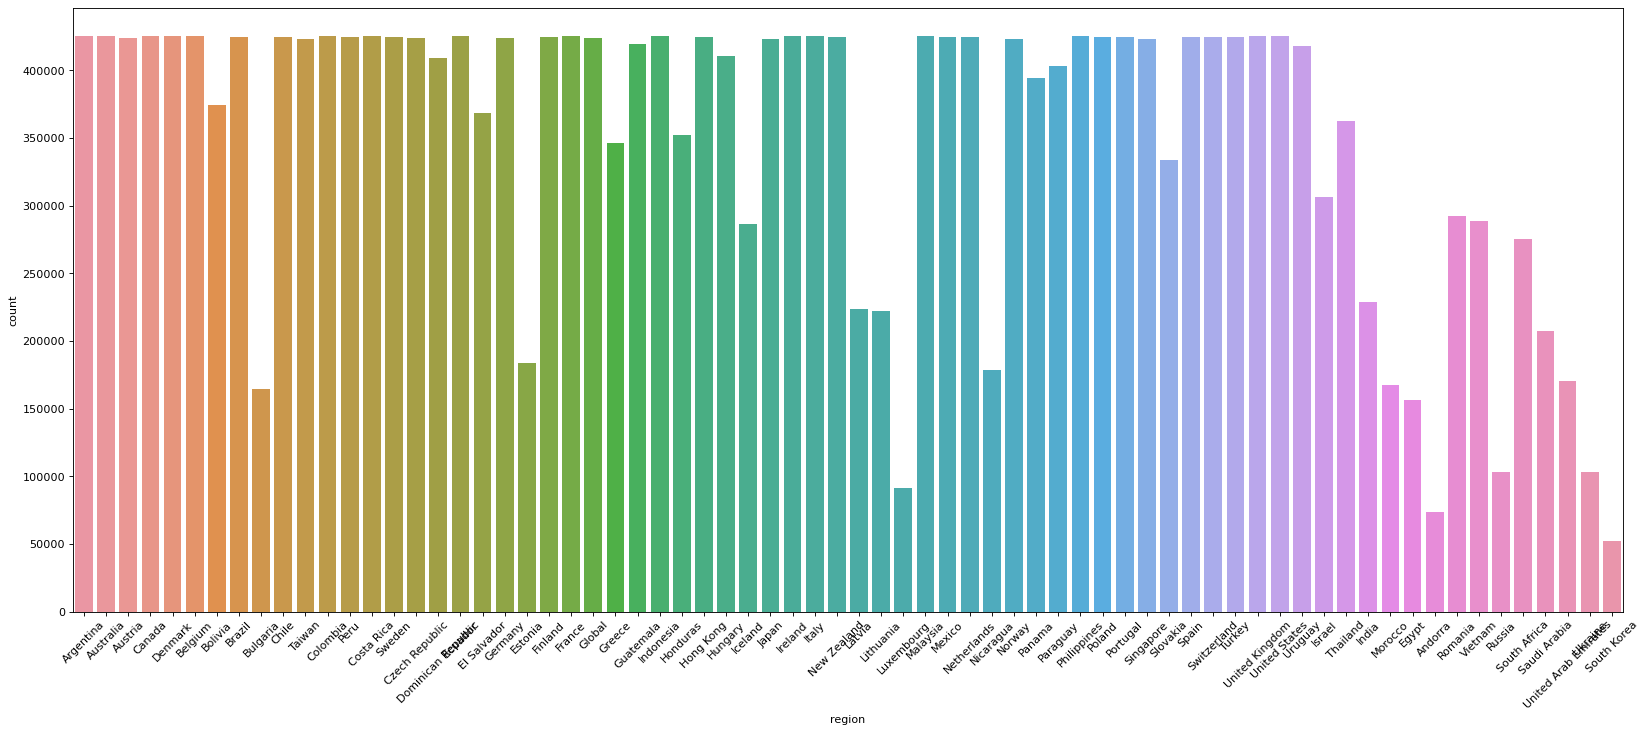

In [26]:
figure(figsize=(25, 10), dpi=80)
sns.countplot(x=charts_with_genre['region'])
plt.xticks(rotation=45)
plt.show()


In [52]:
# Clean special characters causing issues
#     e.g.
#     Joey Bada$$

charts_with_genre['artist_1'] = charts_with_genre['artist'].str.replace('\$\$',"SS")

# charts_with_genre['artist'] = charts_with_genre['artist'].astype(object)

<ipython-input-52-9b833eaaf44e>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  charts_with_genre['artist_1'] = charts_with_genre['artist'].str.replace('\$\$',"SS")


In [ ]:
customer_df.isnull().sum(axis = 0)
customer_df.nunique()

In [53]:
charts_with_genre['artist_1']

0                          Luis Fonsi
1                           Nicky Jam
2                    Enrique Iglesias
3                          Ed Sheeran
4                 Daddy Yankee, Ozuna
                      ...            
24501823                        Jaden
24501824                       My Anh
24501825                        Tlinh
24501826              Big Red Machine
24501827    LRN Slime, Shiloh Dynasty
Name: artist_1, Length: 24501828, dtype: object

In [54]:
charts_with_genre[(charts_with_genre['artist'] == 'Joey Bada$$')].head()

,title,rank,date,artist,url,region,chart,trend,streams,Position,Artist,Streams,Date,Genre,artist_1
1310,ROCKABYE BABY (feat. ScHoolboy Q),199,2017-04-01,Joey Bada$$,https://open.spotify.com/track/31mqc7EKPsJf3pe...,Canada,top200,NEW_ENTRY,18379.0,182.0,Joey Bada$$,525343.0,2017-04-07,"['rap', 'conscious hip hop', 'hip hop', 'under...",Joey BadaSS
9100,DEVASTATED,191,2017-04-01,Joey Bada$$,https://open.spotify.com/track/4ntsD33Pgsgk8rU...,United States,top200,MOVE_DOWN,169933.0,199.0,Joey Bada$$,590910.0,2017-04-11,"['rap', 'conscious hip hop', 'hip hop', 'under...",Joey BadaSS
24634,DEVASTATED,191,2017-04-02,Joey Bada$$,https://open.spotify.com/track/4ntsD33Pgsgk8rU...,United States,top200,SAME_POSITION,156552.0,199.0,Joey Bada$$,590910.0,2017-04-11,"['rap', 'conscious hip hop', 'hip hop', 'under...",Joey BadaSS
27560,ROCKABYE BABY (feat. ScHoolboy Q),187,2017-04-03,Joey Bada$$,https://open.spotify.com/track/31mqc7EKPsJf3pe...,Canada,top200,NEW_ENTRY,19463.0,182.0,Joey Bada$$,525343.0,2017-04-07,"['rap', 'conscious hip hop', 'hip hop', 'under...",Joey BadaSS
32287,DEVASTATED,169,2017-06-01,Joey Bada$$,https://open.spotify.com/track/4ntsD33Pgsgk8rU...,United States,top200,MOVE_UP,187868.0,199.0,Joey Bada$$,590910.0,2017-04-11,"['rap', 'conscious hip hop', 'hip hop', 'under...",Joey BadaSS


In [57]:
charts_with_genre['Genre'].value_counts()

['pop', 'post-teen pop', 'dance pop']                                  681458
['uk pop', 'pop']                                                      496692
['trap latino', 'reggaeton', 'latin']                                  406342
['dfw rap', 'melodic rap', 'rap']                                      255694
['pop', 'electropop']                                                  238745
                                                                        ...  
['permanent wave', 'pop punk', 'punk']                                     10
['miami hip hop', 'underground hip hop', 'dark trap', 'vapor trap']         8
['modern blues', 'soul']                                                    6
['socal pop punk', 'pop punk', 'punk']                                      6
['russelater']                                                              2
Name: Genre, Length: 951, dtype: int64

In [58]:
charts_with_genre['artist'].value_counts()

Ed Sheeran                                 367156
Billie Eilish                              237845
Post Malone                                207437
Bad Bunny                                  187639
Ariana Grande                              185719
                                            ...  
Grady, Cuco, MELVV                              1
Métricas Frías, ZetaZeta, Doble Porcion         1
Qaayel, Seina                                   1
Murdock, Shystie, Sena Dagadu                   1
Nea, Nio Garcia                                 1
Name: artist, Length: 91721, dtype: int64

In [50]:
charts_with_features['name'].value_counts()

Shape of You                                         3.116566e-03
Believer                                             2.713062e-03
Dance Monkey                                         2.547450e-03
Someone You Loved                                    2.529957e-03
Perfect                                              2.466676e-03
                                                         ...     
Morales                                              4.615699e-08
La guerre                                            4.615699e-08
GMO                                                  4.615699e-08
Funky Kachakiña                                      4.615699e-08
Verdammt ich lieb' dich - Gestört aber Geil Remix    4.615699e-08
Name: name, Length: 132242, dtype: float64

In [49]:
charts_with_features.nunique()

title               156583
rank                   200
date                  1704
artist_x             91721
url                 206446
region                  70
chart                    2
trend                    4
streams             759218
Position               174
Artist                1105
Streams               5489
Date                  1432
Genre                  951
track id            206446
Unnamed: 0            3999
name                132242
album               106244
artist_y             54843
duration_ms          82045
release_date          7478
length               82039
popularity              99
acousticness          4408
danceability           958
energy                1694
instrumentalness      5383
key                     12
liveness              1718
loudness             17291
mode                     2
speechiness           1567
tempo                56680
time_signature           5
valence               1610
dtype: int64

In [53]:
# Why are the number of titles and track id's not the same?

charts_with_features[['title','track id','name']].nunique()

title       156583
track id    206446
name        132242
dtype: int64

In [59]:
charts_with_features.groupby(by=["title"]).count()

,rank,date,artist_x,url,region,chart,trend,streams,Position,Artist,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
title,,,,,,,,,,,,,,,,,,,,,
!,293,293,293,293,293,293,293,260,293,293,...,275,275,275,275,275,275,275,275,275,275
!!!,39,39,39,39,39,39,39,0,0,0,...,39,39,39,39,39,39,39,39,39,39
!I'll Be Back!,7,7,7,7,7,7,7,1,0,0,...,7,7,7,7,7,7,7,7,7,7
"""42"" - From SR3MM",1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
"""99""",14,14,14,14,14,14,14,0,0,0,...,14,14,14,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
혼자 하는 사랑 Lonely Love,18,18,18,18,18,18,18,0,0,0,...,18,18,18,18,18,18,18,18,18,18
혼잣말 Talking to,2,2,2,2,2,2,2,0,0,0,...,2,2,2,2,2,2,2,2,2,2
환상통 Only One You Need,1,1,1,1,1,1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [75]:
check_on_url = charts_with_features.groupby(['title']).agg({'url':pd.Series.nunique}).reset_index()


In [91]:
a = check_on_url[(check_on_url['url'] > 1)]
len(a)

25479

In [87]:
len(a)

25479

In [89]:
difference = a['url'].sum() - len(a)
difference

156583
track id    206446

49902

In [90]:
206446 - 156583

49863

In [70]:
# Certain titles have multiple url's → see above
charts_with_features[(charts_with_features['title'] == '#DansLeTierquar (Nantes)')].head(15).T

,4531220,4655369,4676546,4723549,4780934,4901561,4944416,4968920,5043363,5098513,5265617,5501903,5504119,5594799,5680376
title,#DansLeTierquar (Nantes),#DansLeTierquar (Nantes),#DansLeTierquar (Nantes),#DansLeTierquar (Nantes),#DansLeTierquar (Nantes),#DansLeTierquar (Nantes),#DansLeTierquar (Nantes),#DansLeTierquar (Nantes),#DansLeTierquar (Nantes),#DansLeTierquar (Nantes),#DansLeTierquar (Nantes),#DansLeTierquar (Nantes),#DansLeTierquar (Nantes),#DansLeTierquar (Nantes),#DansLeTierquar (Nantes)
rank,53,38,156,22,152,28,178,28,192,20,153,26,49,184,24
date,2018-09-05,2018-09-06,2018-09-06,2018-09-07,2018-09-07,2018-09-08,2018-09-08,2018-09-09,2018-09-09,2018-09-10,2018-09-10,2018-09-11,2018-10-01,2018-09-11,2018-09-12
artist_x,RK,RK,RK,RK,RK,RK,RK,RK,RK,RK,RK,RK,RK,RK,RK
url,https://open.spotify.com/track/26NPCbYyALFIhFl...,https://open.spotify.com/track/26NPCbYyALFIhFl...,https://open.spotify.com/track/26NPCbYyALFIhFl...,https://open.spotify.com/track/26NPCbYyALFIhFl...,https://open.spotify.com/track/26NPCbYyALFIhFl...,https://open.spotify.com/track/26NPCbYyALFIhFl...,https://open.spotify.com/track/26NPCbYyALFIhFl...,https://open.spotify.com/track/26NPCbYyALFIhFl...,https://open.spotify.com/track/26NPCbYyALFIhFl...,https://open.spotify.com/track/26NPCbYyALFIhFl...,https://open.spotify.com/track/26NPCbYyALFIhFl...,https://open.spotify.com/track/26NPCbYyALFIhFl...,https://open.spotify.com/track/3MQuCR2TFmqm34q...,https://open.spotify.com/track/26NPCbYyALFIhFl...,https://open.spotify.com/track/26NPCbYyALFIhFl...
region,France,France,Switzerland,France,Switzerland,France,Switzerland,France,Switzerland,France,Switzerland,France,France,Switzerland,France
chart,top200,top200,top200,top200,top200,top200,top200,top200,top200,top200,top200,top200,top200,top200,top200
trend,NEW_ENTRY,MOVE_UP,NEW_ENTRY,MOVE_UP,MOVE_UP,MOVE_DOWN,MOVE_DOWN,SAME_POSITION,MOVE_DOWN,MOVE_UP,MOVE_UP,MOVE_DOWN,MOVE_DOWN,MOVE_DOWN,MOVE_UP
streams,67128.0,82807.0,4827.0,114040.0,5601.0,103674.0,5016.0,89075.0,3991.0,108417.0,4953.0,92274.0,86419.0,4319.0,102531.0
Position,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
a = charts_with_features[(charts_with_features['artist_x'] == 'Various Artists')]

In [104]:
# Found a track id that returned null from Spotify API.  This track has artist as 'Various Artists'.  
# Checking here to see whether other track id's with 'Various Artists' are also returning no audio features.

a['track id'].unique()

# only first one had no audit features available

array(['3uMIfxV8q5tPTWzJh8s6Mk', '1lbYLzHosdoLEMOUzhh5Tf',
       '06jplse4tO3svbp9oK9usS', '1Dk8oCU570wW9C6Rt8I9gL',
       '2qZG9sBCjN2sUSmC6RYOnx', '77fmOjyBInZelp6zLgupVh',
       '04yRkePgHWUARIDPquxPeR', '4vyVLDXmsPXsCzpyOnx5MT',
       '4SKngNZoHktT0kDRCKzcZq', '0f7TfVYvAGaGPNmAlPjrF4',
       '6PzLEquKX675g9n61L63iF', '67KzaALOCkFAndViJpUCoR',
       '3VxDGHvNVcd2aDtOF3zrRs', '3kjm3kGdnNNBdUXwllKUpJ',
       '2vSCrpZV4UbnFh2uQebf5Y', '5G6VW0VG6VoVzkWyW0pId5',
       '786vTv1nu4ZZFpnj3iFD1q', '2NQB3KXMCuOVTC3za0UWXC',
       '0lw2D9ixBU6UEVJLIBP4EH'], dtype=object)

In [107]:
# Another example of track id with no audio features returned by Spotify API

charts_with_features[(charts_with_features['track id'] == '3i6bp1T04DeyhpTVs9CFIY')]

,title,rank,date,artist_x,url,region,chart,trend,streams,Position,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
23709422,Moya Wami,48,2020-10-23,"Oscar Mbo, MaWhoo",https://open.spotify.com/track/3i6bp1T04DeyhpT...,South Africa,viral50,NEW_ENTRY,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23733831,Moya Wami,43,2020-10-24,"Oscar Mbo, MaWhoo",https://open.spotify.com/track/3i6bp1T04DeyhpT...,South Africa,viral50,MOVE_UP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23751925,Moya Wami,42,2020-10-25,"Oscar Mbo, MaWhoo",https://open.spotify.com/track/3i6bp1T04DeyhpT...,South Africa,viral50,MOVE_UP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23784783,Moya Wami,39,2020-10-26,"Oscar Mbo, MaWhoo",https://open.spotify.com/track/3i6bp1T04DeyhpT...,South Africa,viral50,MOVE_UP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23804497,Moya Wami,43,2020-10-27,"Oscar Mbo, MaWhoo",https://open.spotify.com/track/3i6bp1T04DeyhpT...,South Africa,viral50,MOVE_DOWN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
